<h1><center>Laboratorio 5: La desperación de Mr. Cheems 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristopher Urbina H.
- Nombre de alumno 2: Joaquib Zamora


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/CrisU8/MDS7202-Primavera2024)

## Temas a tratar
- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines y Column Transformers

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender cómo aplicar pipelines de Scikit-Learn para generar procesos más limpios en Feature Engineering.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [63]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
#!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go
from h2o.display import display

# Librerias utiles
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Feature engineering en datos de retail 🛍️

### 0. Cargar Dataset

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

Mr. Cheems, gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas. En una reunión, Mr Cheems le comenta que la calidad de sus datos no es muy buena, por lo que le solicita a usted que limpie su base de datos y cree nuevos atributos relevantes para el negocio.

Por ello, el área de ventas les entrega archivo llamado `online_retail_data.pickle` el cual usted decide cargar a continuación.

In [68]:
# Inserte su código aquí
df_retail = pd.read_pickle('./online_retail_data.pickle')
display(df_retail.head())
display(df_retail.describe())
display(df_retail.info())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,ID489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,ID489434,79323P,PINK CHERRY LIGHTS,12.0,NaT,6.75,13085.0,United Kingdom
2,ID489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,ID489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,ID489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


,Quantity,InvoiceDate,Price
count,393032.000000,391639,392591.000000
mean,13.799726,2010-07-01 04:53:43.573341696,3.309850
min,1.000000,2009-12-01 07:45:00,0.000000
25%,2.000000,2010-03-26 13:08:00,1.250000
50%,5.000000,2010-07-09 11:43:00,1.950000
75%,12.000000,2010-10-14 14:08:00,3.750000
max,19152.000000,2010-12-09 20:01:00,10953.500000
std,98.520773,NaN,35.407209


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400947 entries, 0 to 400946
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400947 non-null  object        
 1   StockCode    400947 non-null  category      
 2   Description  400947 non-null  object        
 3   Quantity     393032 non-null  float64       
 4   InvoiceDate  391639 non-null  datetime64[ns]
 5   Price        392591 non-null  float64       
 6   Customer ID  400947 non-null  category      
 7   Country      392783 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(2), object(2)
memory usage: 17.3+ MB


None

### 1. Función para explorar características [5 puntos]

<p align="center">
  <img width=300 src="https://editor.analyticsvidhya.com/uploads/47389meme.png">
</p>




Tras inspeccionar brevemente los datos proporcionados, usted decide crear una función que realice lo siguiente:
- Plotee un histograma para las variables precios y cantidad. [3 puntos]
- Imprima un conteo de datos nulos por variable [2 puntos]

NOTA: Para generar los gráficos es **OBLIGATORIO** el uso de plotly.

**Respuesta:**

In [40]:
def explore_data(df):
    # Imprimir la cantidad de valores nulos por variable
    for column in df.columns:
        print(f"Valores nulos en {column}: {df[column].isnull().sum()}")
   
    
    # Graficar histograma de Price con KDE
    plt.figure(figsize=(10, 5))
    df['Price'].dropna().plot(kind='hist', bins=30, label='Histograma')  # Histograma
    plt.title('Histograma de Price')
    plt.xlabel('Price')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()
    
    # Graficar histograma de Quantity con KDE
    plt.figure(figsize=(10, 5))
    df['Quantity'].dropna().plot(kind='hist', bins=30, label='Histograma')  # Histograma
    plt.title('Histograma de Quantity')
    plt.xlabel('Quantity')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

Valores nulos en Invoice: 0
Valores nulos en StockCode: 0
Valores nulos en Description: 0
Valores nulos en Quantity: 7915
Valores nulos en InvoiceDate: 9308
Valores nulos en Price: 8356
Valores nulos en Customer ID: 0
Valores nulos en Country: 8164


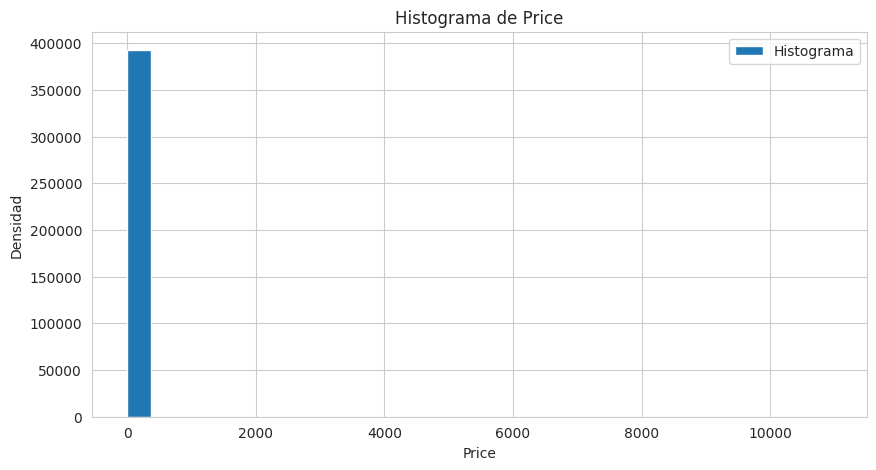

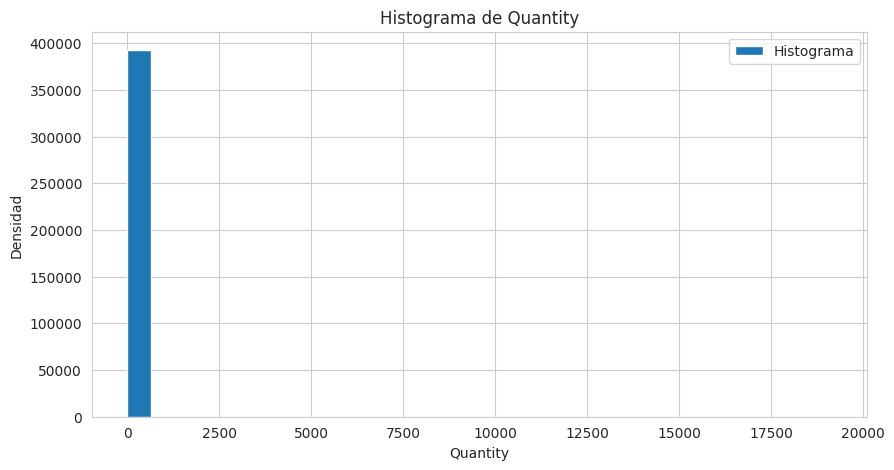

In [41]:
explore_data(df_retail)

### 2. Eliminando outliers [10 puntos]

<p align="center">
  <img width=300 src="https://media.licdn.com/dms/image/C5612AQGdXKCka7HumA/article-cover_image-shrink_600_2000/0/1520056407281?e=2147483647&v=beta&t=VZcfjjzjK4LxXdZkSu1KisWC0Ry8bk4tPCn3R8aYdNM">
</p>




#### 2.1 Creando la clase IQR [5 puntos]

Entre las falencias de los datos, Mr. Cheems le comenta que a veces los operadores no ingresan el precio correcto de los productos. Mr. Cheems le comenta que se dio cuenta de este fenómeno porque hay productos con precios exagerádamente altos o bajos. Por lo cual usted decide eliminar outliers del dataframe a traves del rango intercuartil el cual cuenta con los siguientes pasos:

1. Calcular el primer cuartil $Q1$ y el tercer cuartil $Q3$. Hint: utilice el método `quantile()`

2. Calcular el rango intercuartil (RIC): $RIC = Q3 - Q1$

3. Calcular los límites para identificar outliers:
 - Límite inferior: $~~Q1 - \lambda \cdot RIC$
 - Límite superior: $~~Q3 + \lambda \cdot RIC$

4. Eliminar outliers: Los outliers son los datos que están por debajo del límite inferior o por encima del límite superior.


Para realizar dicha tarea, usted decide crear una clase llamada `IQR()` utilizando `BaseEstimator` y `TransformerMixin` para realizar una transformación de cada una de las columnas numéricas del DataFrame utilizando `ColumnTransformer()` más tarde. Considere que lambda debe ser $\lambda$ un parámetro a definir por el usuario.

Hint: tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer).
>**Nota: No modificar el método set_output de la clase IQR**

**Respuesta:**

In [56]:
class IQR(BaseEstimator, TransformerMixin):
    def __init__(self, lambdaa=1.5):
        """
        Inicializa la clase IQR con un factor lambdaa para definir
        el umbral del rango intercuartílico para la eliminación de outliers.
        """
        self.lambdaa = lambdaa
        self.Q1 = None
        self.Q3 = None
        self.IQR = None

    def fit(self, X, y=None):
        """
        Ajusta el transformador calculando el primer y tercer cuartil (Q1, Q3)
        y el rango intercuartílico (IQR) para cada una de las columnas numéricas.
        """
        X = pd.DataFrame(X)
        self.Q1 = X.quantile(0.25)  # Primer cuartil
        self.Q3 = X.quantile(0.75)  # Tercer cuartil
        self.IQR = self.Q3 - self.Q1  # Rango intercuartílico
        return self

    def transform(self, X, y=None):
        """
        Transforma los datos eliminando outliers, es decir, aquellos valores
        que están por debajo o por encima de los límites definidos por el rango intercuartílico.
        """
        X = pd.DataFrame(X)
        # Cálculo de los límites
        lower_bound = self.Q1 - self.lambdaa * self.IQR
        upper_bound = self.Q3 + self.lambdaa * self.IQR

        # Eliminar los outliers reemplazándolos con NaN (puedes ajustarlo según tu caso)
        X_clean = X.mask((X < lower_bound) | (X > upper_bound))
        
        return X_clean

    def set_output(self, transform='default'):
        # No modificar este método
        return self


Procesando la columna: Price
Procesando la columna: Quantity
Valores nulos en Invoice: 0
Valores nulos en StockCode: 0
Valores nulos en Description: 0
Valores nulos en Quantity: 33698
Valores nulos en InvoiceDate: 9308
Valores nulos en Price: 40290
Valores nulos en Customer ID: 0
Valores nulos en Country: 8164


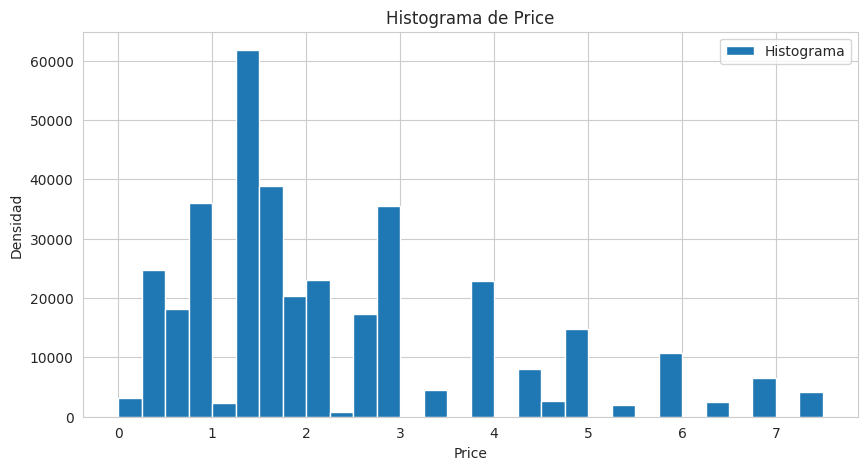

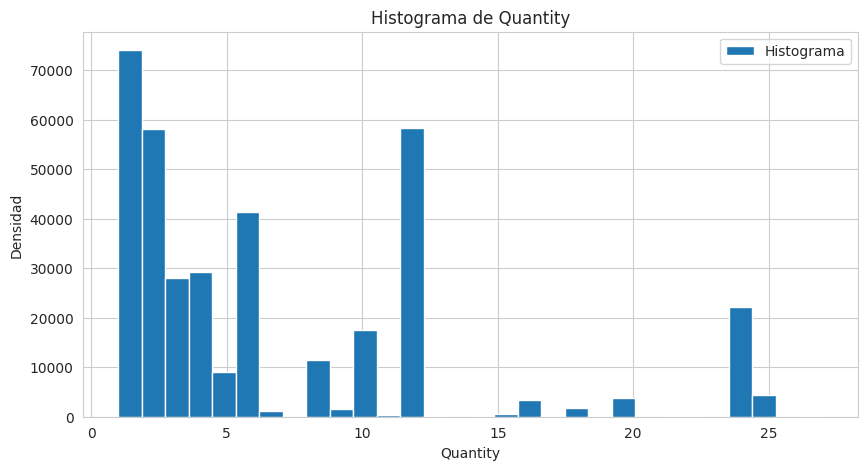

In [58]:
del_outlier = IQR(lambdaa=1.5)

numeric_columns = ['Price','Quantity']
for col in numeric_columns:
    print(f"Procesando la columna: {col}")
    # Ajustar la clase IQR a la columna
    del_outlier.fit(df_retail[[col]])
    # Transformar la columna y eliminar los outliers
    df_clean = del_outlier.transform(df_retail[[col]])
    # Actualizar el DataFrame original con los valores limpios (sin outliers)
    df_retail[col] = df_clean[col]

explore_data(df_retail)

#### 2.2 Creación del Pipeline [5 puntos]

Para comenzar introduciéndose en el uso de pipeline, usted decide definir un pipeline con el Transformer previamente definido. Además, usted decide visualizar cómo cambia la distribución de las variables Precio y Cantidad antes y despues de aplicar IQR. Para ello, usted aplica los siguientes pasos:

- Definir un pipeline llamado `numeric_transformations` para las variables precio y cantidad con la transformación IQR. [1 punto]
- Defina un column transformer que aplique `numeric_transformations` para las variables numéricas y `passthrough` para las variables categóricas. Adicionalmente, fije el parámetro `verbose_feature_names_out` en `False`. Ver hint al final [1 puntos]
- Defina el dataframe `df_iqr` aplicado el column transformer a los datos proporcionados por Mr. Cheems considerando un valor de $\lambda$ que tenga un desempeño aceptable para ambas variables. [1 punto]
- Usar `explore_data` en `df_retail` y en `df_iqr`.  [1 punto]
- Reportar los cambios observados en la distribución de las variables. ¿Qué sucede al aumentar el valor de lambda? [1 punto]


HINT: El transformador `passthrough` está predefinido y es una opción que puedes usar para las columnas que no deseas transformar. Al especificar 'passthrough' para una parte de tu ColumnTransformer, las columnas correspondientes pasarán a través del ColumnTransformer sin ninguna modificación. El siguiente [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) le puede ser útil.
>**Nota: Mantenga el método set_output del column transformer con la transformación `pandas` para obtener un dataframe una vez aplicado el column transformer.**

**Respuesta:**

Apóyese de la siguiente estructura para su respuesta:

Distribución original:
Valores nulos en Invoice: 0
Valores nulos en StockCode: 0
Valores nulos en Description: 0
Valores nulos en Quantity: 7915
Valores nulos en InvoiceDate: 9308
Valores nulos en Price: 8356
Valores nulos en Customer ID: 0
Valores nulos en Country: 8164


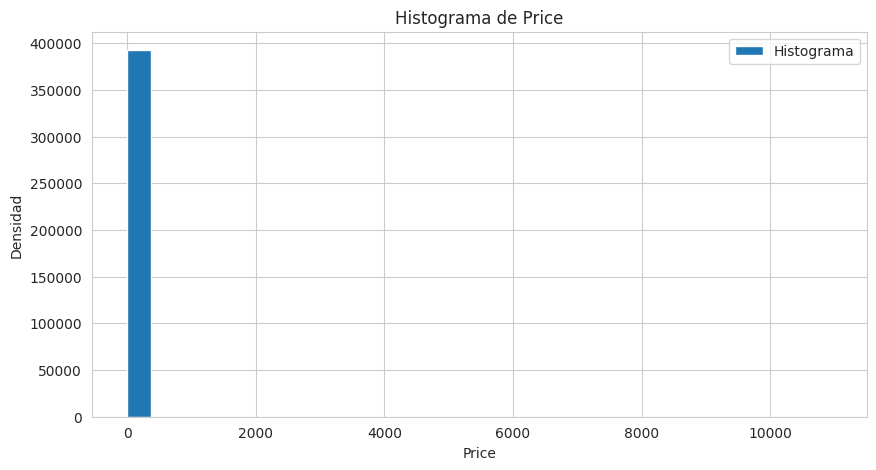

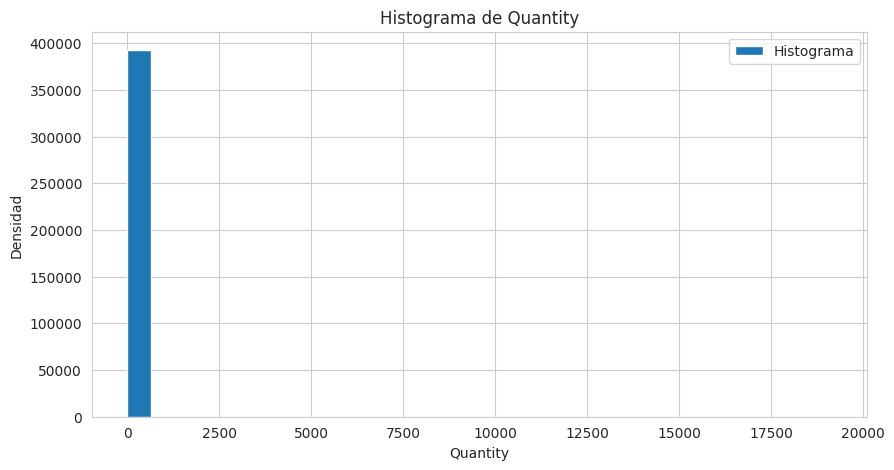

Distribución después de aplicar IQR:
Valores nulos en Price: 40290
Valores nulos en Quantity: 33698
Valores nulos en StockCode: 0
Valores nulos en Customer ID: 0
Valores nulos en Country: 8164
Valores nulos en Invoice: 0
Valores nulos en InvoiceDate: 9308
Valores nulos en Description: 0


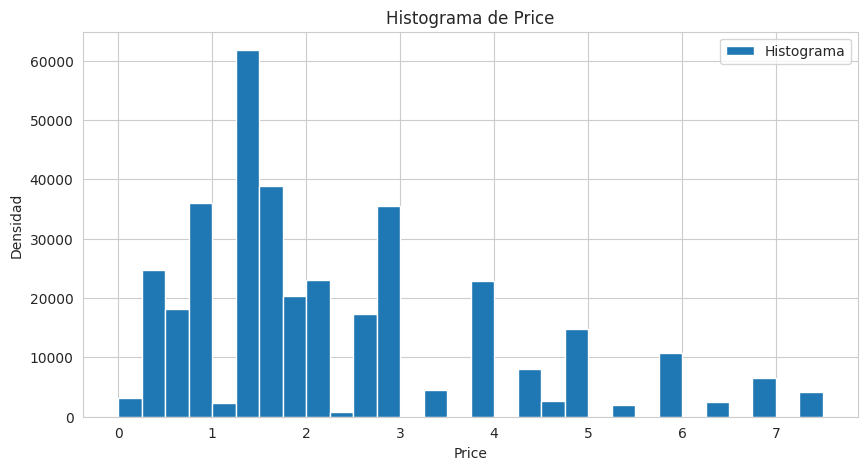

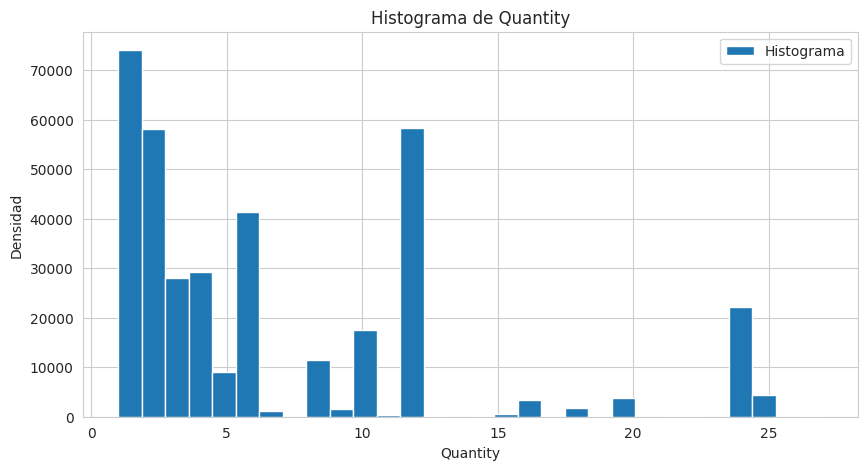

In [66]:
# Definicion las variables que pasarán por cada pipeline
numerical_columns = ['Price','Quantity']
categorical_columns = ['StockCode','Customer ID','Country','Invoice','InvoiceDate','Description']

# Definicion del pipeline
numeric_transformations = Pipeline(steps=[(
    'iqr', IQR(lambdaa=1.5))
])

# ColumnTransformer
column_transformer = ColumnTransformer([('numerical', numeric_transformations,numeric_columns),
                                        ('categorical', 'passthrough', categorical_columns)
                                        ],
                                        verbose_feature_names_out=False)

column_transformer.set_output(transform='pandas')

# Aplicamos ColumnTransformer a los datos
df_iqr = column_transformer.fit_transform(df_retail)

# Gráficos
print("Distribución original:")
explore_data(df_retail)

print("Distribución después de aplicar IQR:")
explore_data(df_iqr)

*Al eliminarse los valores atipicos la distribución de ambas variables se ve mucho más clara graficamente*

### 3. Agregando un imputer al pipeline [10 puntos]



<p align="center">
  <img width=300 src="https://media.makeameme.org/created/hmm-there-is.jpg">
</p>

Para continuar con la limpieza del dataframe usted decide imputar los datos nulos de las variables numéricas, para lo cual decide realizar las siguientes tareas:

1. Crear un pipeline para variables categóricas llamado `categoric_transformations` con un paso llamado `mode_imputer`, en el cual se imputen los datos faltantes por la categoría más frecuente.
2. Agregar al pipeline `numeric_transformations` un paso llamado `mean_imputer`, en el cual se imputen los datos por la media usando [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) [1 punto]
3. Crear y aplicar un `ColumnTransformer` actualizado con los pipelines `categoric_transformations` y `numeric_transformations` a `df_retail`, creando un dataframe llamado `df_mean_imputer`. [1 punto]
4. Comparar los resultados de `explore_data` en `df_mean_imputer` y `df_iqr`. ¿Qué diferencias observa en la distribución de los datos? [2 puntos]
5. Cambiar el imputer de `numeric_transformations` por [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) y definir un nuevo dataframe llamado `df_knn_imputer`, aplicando el nuevo ColumnTransformer a `df_retail`. En caso de los tiempos de ejecución sean altos puede probar a reducir el parámetro `n_neighbors`. [1 punto]
6. Comparar los resultados de `explore_data` en `df_knn_imputer` y `df_iqr`. ¿Qué diferencias observa en la distribución de los datos? [2 puntos]
7. Comparar los resultados de `explore_data` en `df_knn_imputer` y `df_mean_imputer`. ¿Cuál método de imputación es mejor? Deje el método escogido en el ColumnTransformer. [2 puntos]

>**Nota: Fije el parámetro verbose_feature_names_out en `False` y utilice el método set_output con transformación `pandas` en cada ColumnTransformer para obtener como salida un dataframe.**

**Respuesta:**

### Simpleimputer con media

Distribución con IQR:
Valores nulos en Price: 40290
Valores nulos en Quantity: 33698
Valores nulos en StockCode: 0
Valores nulos en Customer ID: 0
Valores nulos en Country: 8164
Valores nulos en Invoice: 0
Valores nulos en InvoiceDate: 9308
Valores nulos en Description: 0


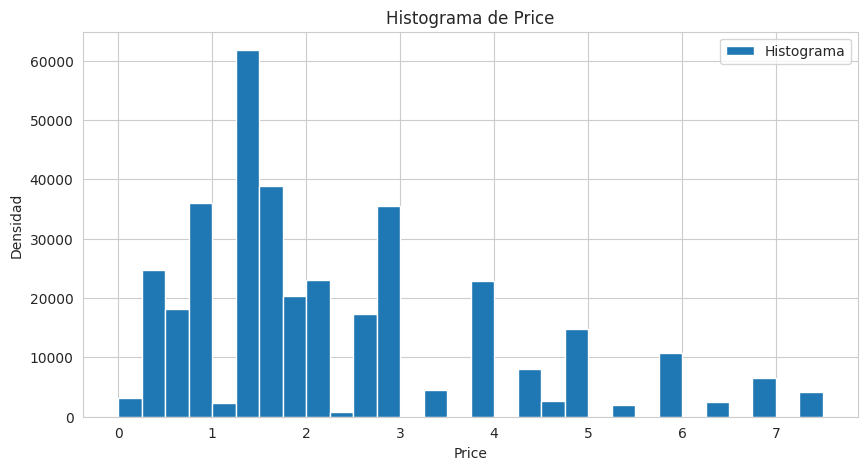

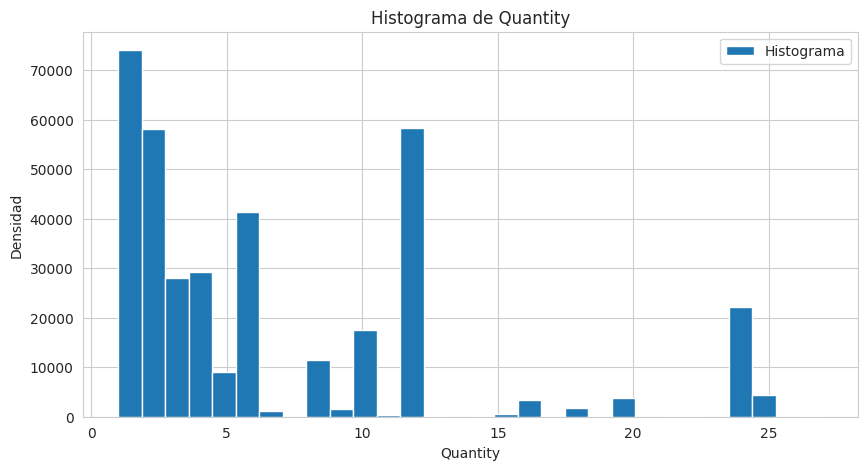

Distribución con Media (df_mean_imputer):
Valores nulos en Price: 0
Valores nulos en Quantity: 0
Valores nulos en StockCode: 0
Valores nulos en Customer ID: 0
Valores nulos en Country: 0
Valores nulos en Invoice: 0
Valores nulos en InvoiceDate: 0
Valores nulos en Description: 0


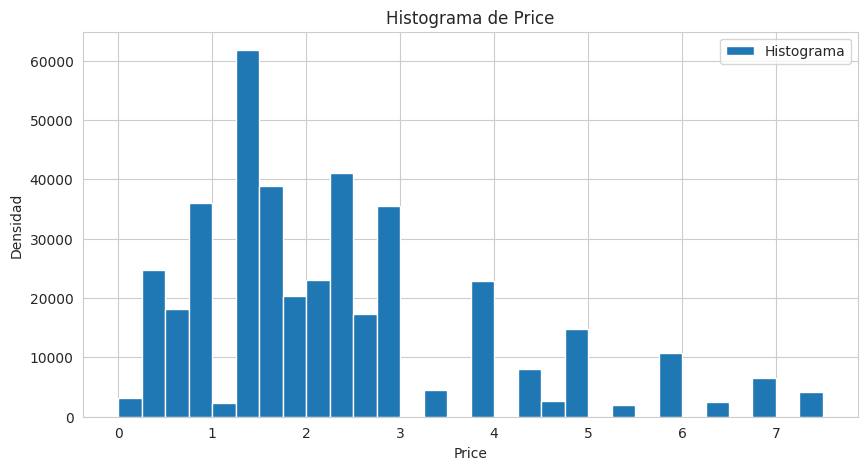

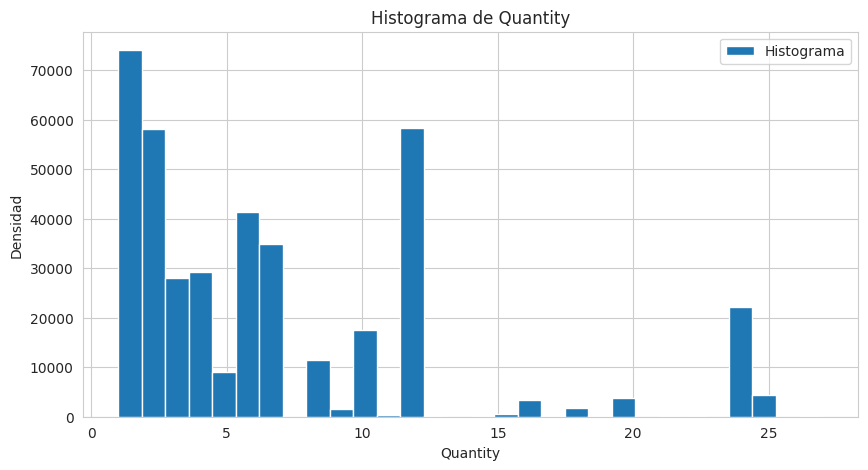

In [69]:
from sklearn.impute import SimpleImputer

# Pipeline para las variables categóricas
categoric_transformations = Pipeline(steps=[
    ('mode_imputer', SimpleImputer(strategy='most_frequent'))  # Imputar por la categoría más frecuente
])

# Agregar al pipeline de las variables numéricas el paso de imputación por la media
numeric_transformations = Pipeline(steps=[
    ('iqr', IQR(lambdaa=1.5)),  # Eliminar outliers
    ('mean_imputer', SimpleImputer(strategy='mean'))  # Imputar por la media
])

# Crear el ColumnTransformer
column_transformer_mean = ColumnTransformer([
    ('numerical', numeric_transformations, numeric_columns),
    ('categorical', categoric_transformations, categorical_columns)
], verbose_feature_names_out=False)

# Configurar para devolver DataFrame de pandas
column_transformer_mean.set_output(transform='pandas')

# Aplicar el ColumnTransformer a df_retail para imputar por la media
df_mean_imputer = column_transformer_mean.fit_transform(df_retail)

# Comparar los resultados
print("Distribución con IQR:")
explore_data(df_iqr)

print("Distribución con Media (df_mean_imputer):")
explore_data(df_mean_imputer)

*Ambas distribuciones se ven más uniformes en torno a la media*

### KNNimputer

In [71]:
from sklearn.impute import KNNImputer

# Cambiar imputador a KNNImputer
numeric_transformations_knn = Pipeline(steps=[
    ('iqr', IQR(lambdaa=1.5)),  # Eliminar outliers
    ('knn_imputer', KNNImputer(n_neighbors=2))  # Imputar con KNN
])

# Crear el ColumnTransformer con KNNImputer
column_transformer_knn = ColumnTransformer([
    ('numerical', numeric_transformations_knn, numeric_columns),
    ('categorical', categoric_transformations, categorical_columns)
], verbose_feature_names_out=False)

# Configurar para devolver DataFrame de pandas
column_transformer_knn.set_output(transform='pandas')

# Aplicar el ColumnTransformer a df_retail para imputar con KNN
df_knn_imputer = column_transformer_knn.fit_transform(df_retail)

# Comparar los resultados
print("Distribución con IQR:")
explore_data(df_iqr)

print("Distribución con KNN (df_knn_imputer):")
explore_data(df_knn_imputer)

KeyboardInterrupt: 

In [ ]:
# Comparar los resultados
print("Distribución con Media (df_mean_imputer):")
explore_data(df_mean_imputer)

print("Distribución con KNN (df_knn_imputer):")
explore_data(df_knn_imputer)

### 4. Creación de nuevas features [20 puntos]

<p align="center">
  <img width=250 src="https://miro.medium.com/max/1000/1*JtTWgAcfVTWV8OTjT47Atg.jpeg">
</p>


#### 4.1 Definicion de LRMFP [10 puntos]
(2 puntos por cada custom feature)

Dado que Mr. Lepin está interesado en obtener nuevos atributos relevantes para su negocio, su equipo de expertos sugiere la construcción de variables **LRMFP**, las que se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales. **Considere "hoy" como la fecha mas reciente del dataset**.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente.

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.


$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**<u>Formato</u> del Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

**Respuesta:**

In [72]:
def custom_features(df):
    # Calcular la primera y última fecha de compra por cliente
    first_visit = df.groupby('Customer ID')['InvoiceDate'].min()
    last_visit = df.groupby('Customer ID')['InvoiceDate'].max()
    
    # Calcular L: Length (días entre primera y última visita)
    L = (last_visit - first_visit).dt.days
    
    # Calcular R: Recency (hace cuanto fue la última compra)
    today = df['InvoiceDate'].max()  # "hoy" es la fecha más reciente del dataset
    R = (today - last_visit).dt.days
    
    # Calcular M: Monetary (gasto promedio por visita)
    df['spent'] = df['Quantity'] * df['Price']
    total_spent = df.groupby('Customer ID')['spent'].sum()
    total_visits = df.groupby('Customer ID')['InvoiceDate'].count()
    M = total_spent / total_visits
    
    # Calcular F: Frequency (número total de visitas)
    F = total_visits
    
    # Calcular P: Periodicity (desviación estándar de los intervalos de tiempo entre visitas)
    df = df.sort_values(['Customer ID', 'InvoiceDate'])  # Ordenar por cliente y fecha
    df['prev_date'] = df.groupby('Customer ID')['InvoiceDate'].shift(1)  # Fecha de la visita anterior
    df['IVT'] = (df['InvoiceDate'] - df['prev_date']).dt.days  # Calcular intervalos entre visitas
    P = df.groupby('Customer ID')['IVT'].std()  # Desviación estándar de los intervalos
    
    # Unir todas las características en un DataFrame
    features = pd.DataFrame({
        'Length': L,
        'Recency': R,
        'Monetary': M,
        'Frequency': F,
        'Periodicity': P
    }).reset_index()
    
    return features


In [73]:
custom_features(df_mean_imputer)

,Customer ID,Length,Recency,Monetary,Frequency,Periodicity
0,12346.0,196,164,11.298788,33,20.702944
1,12347.0,274,2,17.932019,71,28.606649
2,12348.0,0,73,11.108000,20,0.000000
3,12349.0,234,42,17.339921,102,16.952607
4,12351.0,0,10,13.831643,21,0.000000
...,...,...,...,...,...,...
4309,18283.0,275,17,2.484362,217,11.744164
4310,18284.0,0,66,10.931932,28,0.000000
4311,18285.0,0,295,10.929045,12,0.000000
4312,18286.0,247,111,15.918438,67,22.487292


#### 4.2 Agregando las custom features [10 puntos]

Ahora, usted decide agregar al pipeline las nuevas variables creadas, para lo cual realiza las siguientes tareas:

1. Cree un nuevo pipeline llamado `retail_pipeline` que encapsule el ColumnTransformer y calcule las LRMFP. El primer paso del pipeline llámelo  `col_tranformer` y el segundo paso llámelo `custom_features`, incorpora las nuevas variables al dataframe. Hint: les puede ser útil investigar [este](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) método. [1 punto]
2. Aplicar el pipeline actualizado a los datos proporcionados por Mr. Cheems, creando un nuevo dataframe llamado `df_custom`. [1 punto]
3. Explorar la distribución de las nuevas variables con `explore_data` y comentar brevemente (2-3 líneas) características de cada custom feature. [5 puntos]
5. Entregar un insight para el negocio en base a las nuevas variables. [3 puntos]

>Nota: Recuerde fijar el parámetro `verbose_feature_names_out` en `False` e incorporar el método `set_output` para obtener una salida en formato dataframe del ColumnTransformer.

**Respuesta**

### 5. MinMax Scaler [10 puntos]

<p align="center">
  <img width=300 src="https://i.imgflip.com/1fsprn.jpg">
</p>


#### 5.1 Definición del Column Transformer [5 puntos]

Construya una clase llamada `MinMax()` para realizar una transformación de cada una de las columnas de un DataFrame utilizando `ColumnTransformer()`. Recuerde  usar `BaseEstimator` y `TransformerMixin`.


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$


Consulte el siguiente [link](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer) si tiene dudas sobre la creación de custom transformers.

**Respuesta:**

In [ ]:
class MinMax(BaseEstimator, TransformerMixin):

    def fit(self,X):
        #Agregar código aquí
        pass

    def transform(self,X):
        #Agregar código aquí
        pass

    def set_output(self,transform='default'):
        #No modificar este método
        return self



#### 5.2 Incorporando MinMax al pipeline [5 puntos]

Ahora, usted decide agregar el escalamiento al pipeline, para lo que decide seguir los siguientes pasos:

- Agregar el paso `minmax` al pipeline `numeric_transformations`, haciendo uso de la clase creada. [1 punto]
- Defina el dataframe `df_minmax` aplicando el ColumnTransformer actualizado a los datos proporcionados por Mr. Cheems. [1 punto]
- Usar `explore_data` en `df_retail` y en `df_minmax`. [1 punto]
- Reportar los cambios observados en la distribución de las variables.  [2 puntos]

>Nota: Recuerde fijar el parámetro `verbose_feature_names_out` en `False` e incorporar el método `set_output` para obtener una salida en formato dataframe del ColumnTransformer.

**Respuesta:**

### 6. Pregunta teórica [5 puntos]

<p align="center">
  <img width=300 src="https://file.coinexstatic.com/2023-09-19/166BAC031F222E5910954E7D7D0BC844.png">
</p>

Finalmente, explíquele a Mr. Cheems porqué es útil la creación de pipelines al momento de hacer Feature Engineering en Machine Learning.

**Respuesta:**

*Porque de esta forma se estandariza un metodo completo de transformaciones corriendo solo unas pocas lineas de codigo. Especialmente útil en machine learning cuando vienen nuevos datos para ser procesados.*

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>